In [1]:
import pandas as pd

import warnings
warnings.simplefilter(action='ignore')

from helpers import clmap, netmap, cik_loader, sec_loader, xml_parser

## Create CIK list

In [ ]:
cikloader = cik_loader()
cikloader.fetch(days=3, filepath='cik.csv')

In [ ]:
# read the CIK list, format CIK's as 10-digit strings, and take a look

codes = pd.read_csv('cik.csv')
codes['CIK'] = codes['CIK'].astype(str).apply(lambda cik: cik.zfill(10))
codes.drop(columns='Unnamed: 0', inplace=True)
codes.head()

## Load data from CIK list, fetch from SEC website

In [ ]:
secloader = sec_loader('test')

cikCodes = codes['CIK']
secloader.fetch(cikCodes, '2021-03-01', '2021-05-31')

## Parse data into dataframes and save as csv

In [ ]:
parser = xml_parser('test/sec-edgar-filings')

parser.parse(num=100, savepath='test.csv')

In [ ]:
df = pd.read_csv('test.csv')
df.head()

## Cluster on correlation matrix

In [ ]:
cmap = clmap('test.csv')
cmap.calculate('ward', (10,10))

## Bipartite graph analysis

Nodes in graph: 261
Edges in graph: 433


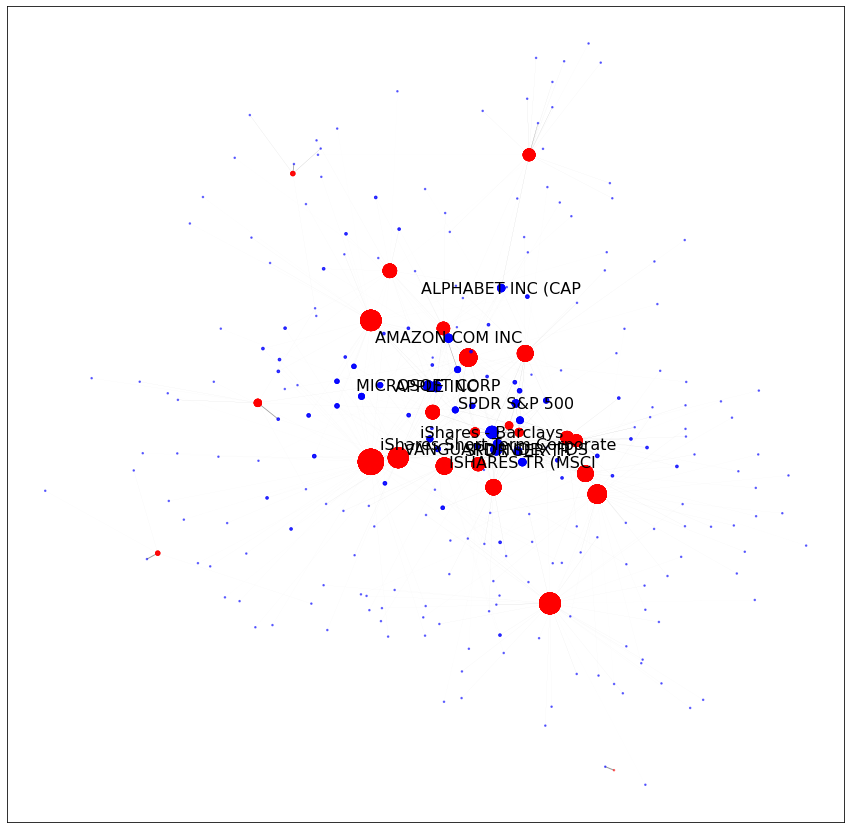

In [9]:
nmap = netmap('test.csv')
nmap.calculate(threshold=0.01, gravity=1, num=30, figsize=(15,15))